<a href="https://colab.research.google.com/github/Umang-Lodaya/Technocrats_LOC-5.0/blob/main/Technocrats_LOC_5_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np 
import pandas as pd 

paths = []
pan_paths = []

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/LOC Technocrats'):
    if dirname == "/content/drive/MyDrive/LOC Technocrats/Id-Dataset/aadhar":
        for filename in filenames:
            path = dirname + '/' + filename
            paths.append(path)
    elif dirname == "/content/drive/MyDrive/LOC Technocrats/Id-Dataset/pan":
        for filename in filenames:
            path = dirname + '/' + filename
            pan_paths.append(path)

for i in paths[:5]:
    print(i)

for i in pan_paths[:5]:
    print(i)

/content/drive/MyDrive/LOC Technocrats/Id-Dataset/aadhar/26.jpg
/content/drive/MyDrive/LOC Technocrats/Id-Dataset/aadhar/4.jpg
/content/drive/MyDrive/LOC Technocrats/Id-Dataset/aadhar/18.jpg
/content/drive/MyDrive/LOC Technocrats/Id-Dataset/aadhar/12.jpg
/content/drive/MyDrive/LOC Technocrats/Id-Dataset/aadhar/2.jpg
/content/drive/MyDrive/LOC Technocrats/Id-Dataset/pan/3333.jpeg
/content/drive/MyDrive/LOC Technocrats/Id-Dataset/pan/guiu.jpg
/content/drive/MyDrive/LOC Technocrats/Id-Dataset/pan/Rajesh PAN Card.jpg
/content/drive/MyDrive/LOC Technocrats/Id-Dataset/pan/jlkkkn.jpg
/content/drive/MyDrive/LOC Technocrats/Id-Dataset/pan/dddddd.jpg


In [4]:
import easyocr
import cv2
from google.colab.patches import cv2_imshow

In [5]:
def funct(path):
    img = cv2.imread(path)
    # cv2_imshow(img)
    reader = easyocr.Reader(['en'])
    result = reader.readtext(img, detail = 0)
    return result

In [6]:
outputs = []
for i in paths:
    outputs.append(' '.join(funct(i)))

In [7]:
outputs[:10]

['HT HTTN Govexnmen: cl India Ig7 7Gu Kunta Knnozhzn TarTpor 11/09*1353 TAT / Feciele 2114 5270 9955 HTER HT4 3141 T 3fu47',
 '8689 2565 8268 HTU77 3MTJT #i & #f0c JURAJ 84J4, 7 FA Woz C1c04T: 8689 2565 8268 HTUTT 31TA 314H 3uF Open',
 '5947 1158 3638 JcH #1 3uaFt HUR HT4',
 '@b8w  N1J8TTI6SLD Government of India g6UQTWJI Csm Aishwarya G 0dbg BitGT DOB 17/11/1999 QuGUTUrou Female 3052 7875 6145 950if &0gmIGoot   LO6oflg6oflgot   91g1s1gu',
 'FI 4U Priranko Vunjar TT ! Ycar D Dut 1824 41741 Famnin 7911 9635 8981 MM4R 314 3aff #1 aferr',
 'aat 744M Scumudo FIfwOOe Q101/1083 {M4lE 50bd [483 00z1 4u t TrT',
 'HRT HITR Government of India RrRT Riyasat J4 fafet/ DOB: 01/01/1991 9 1 MALE 6754 3973 8680 AT 3r8R , A 4uit',
 'HRd Htn KOvEbNMENTO= INDIA Jh aTIDOB.25/12/1993 5or Male 3962 4463 577 H<T 3TETr, H& 4JTt',
 'ATT TTT Government of India 3ut 7974 77 L Reshma Raza 1 74 AridoB: 06/07/1968 8 9a FEMALE 1 3 8 1 8 8378 7495 7171 VID : 9186 5263 2401 8327 AT 3ret< , TTT 98 JTT',
 'Taia Rajeev S

In [8]:
len(outputs)

38

In [9]:
import re
uid = []
nan = []
j = 1
for i in outputs:
    id = re.findall('\d{4}[\s|]\d{4}\s\d{4}', i)
    if id == []:
        nan.append(outputs.index(i))
        print(j, outputs.index(i))
        j += 1
    else:
        uid.append(id[0])

1 5
2 7
3 10
4 12
5 13
6 25
7 28
8 29
9 30
10 32
11 34
12 35
13 36


In [10]:
for i in uid:
    print(uid.index(i), i)

0 2114 5270 9955
1 8689 2565 8268
2 5947 1158 3638
3 3052 7875 6145
4 7911 9635 8981
5 6754 3973 8680
6 8378 7495 7171
7 6903 2611 1844
0 2114 5270 9955
9 3066 2940 6413
10 6008 9344 1710
11 6033 1325 0609
12 9748 5386 8028
2 5947 1158 3638
14 7332 1173 5961
15 2003 1388 4901
16 9121 4079 4234
17 4148 3474 4070
18 7648 5731 9055
7 6903 2611 1844
20 8716 0813 8875
21 2621 4644 2086
22 9502 1517 6995
23 9298 6849 3111
24 2334 6936 1311


In [11]:
len(nan)

13

In [12]:
len(uid) / len(outputs)

0.6578947368421053

In [13]:
# for i in nan:
#     print(i, outputs[i], '\n')

# for i in nan:
#     img = cv2.imread(paths[i])
#     cv2_imshow(img)
#     print("\n", outputs[i], '\n\n')

In [14]:
outputs = []
for i in pan_paths:
    outputs.append(' '.join(funct(i)))

In [15]:
len(outputs)

32

In [16]:
outputs[:11]

['Brar]frtrT FRT rTr INCOME TAX DEPARTMENT GOVT OF INDIA terft +u1 Hr4T zle Permanent Account Number Card BLAPTO864M 4T4 Name TANKNATH fum #1 7T4 Falher" $ Name MOTIkHAR 77 #1 Tr Date ot Birth 2,naq 01/01/1965 #E7T81 / Signalure',
 '3143r TarT HRT TTET INCUME TaX DEPARTMENT GOVT OF INDIA SRINIVASA GV VENKATESHAPPA 07/04/1984 Fumant BJAPS76E6C Se 3ianalune',
 'Birr fat TRT TREr INCOME TAX DEPARTMENT GOVT. OF INDIA RAJESH BALKRISHNA MISHRA B R MISHRA 01/01/1990 Permanent Account Number AUUPM695AD Qaee Signature',
 '314r fetT HTT TFR INCOWE TaX DZPARTMENT GOVT OF INDIA turit 4 tT 4Y1-Fd Pczzancniccount Yumty Cu AAMPI804ZF RoFrL ESAE al Fathe/& Mamo Shaikh_uouimathuan 04 Tl( DeectBirth 18/07/1860 ThntTtl Sionaluro',
 '814er TarT TRT TrETr LRCOKE TAX DEPARTMENT COVT, OF INDIA RAKESH E THEKKUMTHODATH GOPALAN BOSE 14/05/1986 Penit ATOPBO7SOH',
 '&zar_far HRT RER MCOHEiaX DEPARTMENT GOVT . OF INDIA aajendrA behera RABINDRA BEHEAA 31/10/1985 Perimmeri CAsteala AZUPB51970 Ink &r 5ig787iro',
 '1e

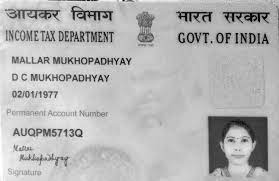

In [17]:
img = cv2.imread(pan_paths[10], 0)
cv2_imshow(img)

In [18]:
import re
pan = []
nan = []
j = 1
for i in outputs:
    id = re.findall("[A-Z]{5}[0-9]{4}[A-Z]{1}", i)
    print(outputs.index(i), id)
    if id == []:
        nan.append(outputs.index(i))
        # print(j, outputs.index(i))
        j += 1
    else:
        pan.append(id[0])

0 []
1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 ['BLAPT0864M']
10 []
13 ['ANRPM2537J']
14 ['BNQPP8824B']
15 []
16 ['AQSPL9772C']
17 []
18 []
19 ['AZHPN8387P']
20 []
21 []
22 ['AHEPY8216D']
23 []
24 ['BFDPM6385P']
25 ['DZJPM4230D']
26 []
27 ['BJQPP5524G']
28 []
29 []
30 []
31 ['BZGPK3157C']


In [19]:
for i in pan:
    print(pan.index(i), i)

0 BLAPT0864M
1 ANRPM2537J
2 BNQPP8824B
3 AQSPL9772C
4 AZHPN8387P
5 AHEPY8216D
6 BFDPM6385P
7 DZJPM4230D
8 BJQPP5524G
9 BZGPK3157C


In [20]:
len(nan)

22

In [21]:
len(pan) / len(outputs)

0.3125

In [ ]:
for i in nan:
    img = cv2.imread(pan_paths[i])
    cv2_imshow(img)
    print("\n", outputs[i], '\n\n')

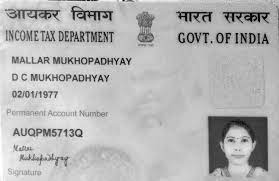

In [26]:
img = cv2.imread(pan_paths[10], 0)
cv2_imshow(img)

In [27]:
img.shape

(181, 279)

In [36]:
def THRES(image, T = 180):
    h, w = image.shape

    th = []
    for i in range(h):
        temp = []
        for j in range(w):
            r = image[i][j]
            if r >= T:
                temp.append(255)
            else:
                temp.append(r)
        
        th.append(temp)
    
    return np.array(th)

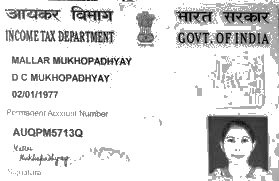

In [37]:
th = THRES(img)
cv2_imshow(th)

In [42]:
th.shape

(181, 279)

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(th)

In [ ]:
id = re.findall("[A-Z]{5}[0-9]{4}[A-Z]{1}", ' '.join(result))
print(outputs.index(i), id)